In [16]:
# Required libraries 
import pandas as pd

# Path
file_path = r'C:\Users\91790\Downloads'

# Load datasets using absolute paths
customers = pd.read_csv(file_path + r'\Customers.csv')
products = pd.read_csv(file_path + r'\Products.csv')
transactions = pd.read_csv(file_path + r'\Transactions.csv')

print("Customers Dataset:\n", customers.head())
print("\nProducts Dataset:\n", products.head())
print("\nTransactions Dataset:\n", transactions.head())

Customers Dataset:
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166

In [17]:

print("\nMissing Values in Customers:\n", customers.isnull().sum())
print("\nMissing Values in Products:\n", products.isnull().sum())
print("\nMissing Values in Transactions:\n", transactions.isnull().sum())

print("\nDuplicate Rows in Transactions:", transactions.duplicated().sum())


Missing Values in Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Duplicate Rows in Transactions: 0


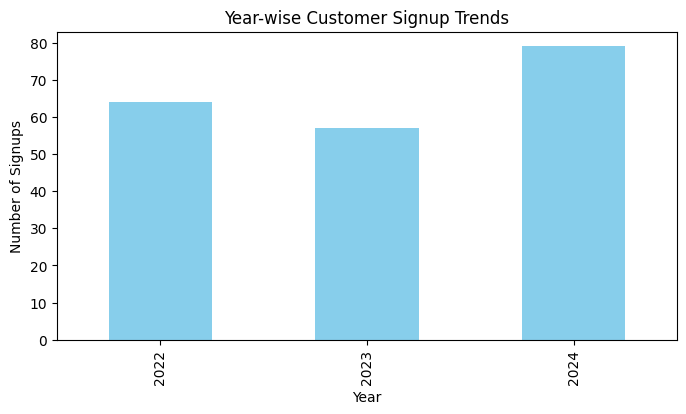

In [18]:
import matplotlib.pyplot as plt

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

signup_trends = customers['SignupDate'].dt.year.value_counts().sort_index()
plt.figure(figsize=(8, 4))
signup_trends.plot(kind='bar', color='skyblue')
plt.title('Year-wise Customer Signup Trends')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.show()

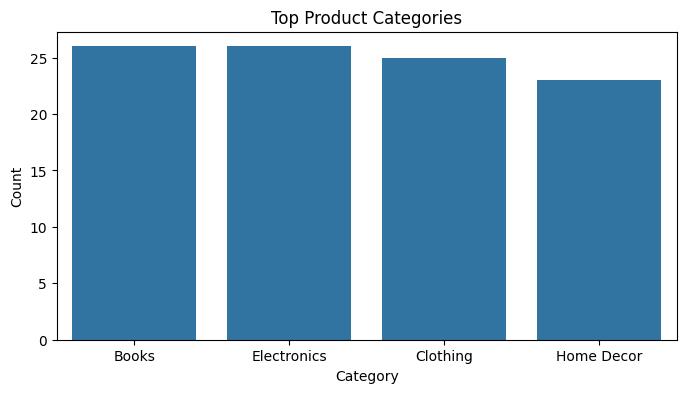

In [19]:
import seaborn as sns

top_categories = products['Category'].value_counts()

plt.figure(figsize=(8, 4))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.title('Top Product Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


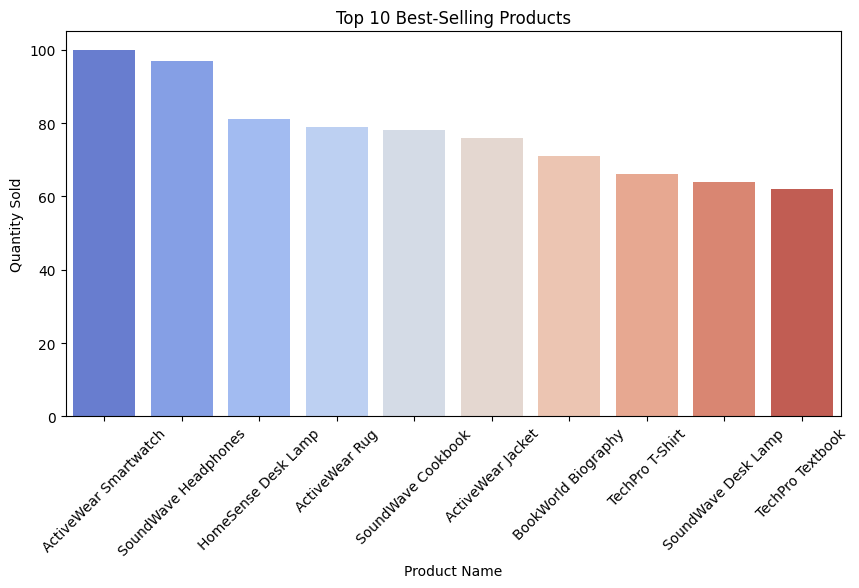

In [20]:
import seaborn as sns

# Merge data
merged_data = transactions.merge(products, on='ProductID')

# Top Products Sold Visualization
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.index, y=top_products.values, hue=top_products.index, palette='coolwarm')  # Added hue
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()


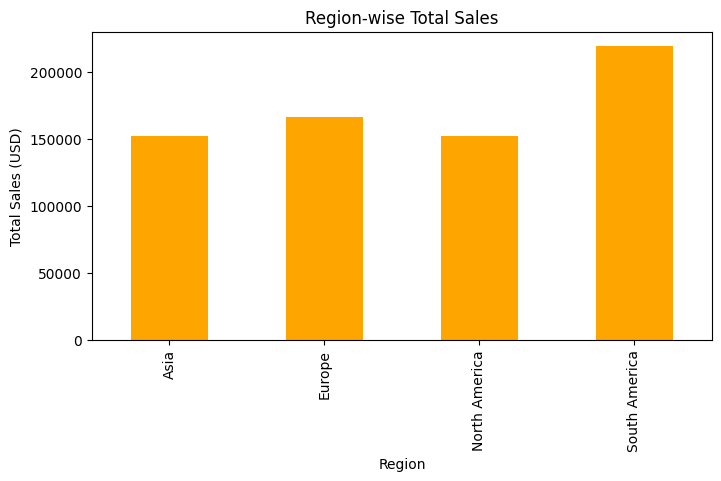

In [21]:

region_sales = transactions.merge(customers[['CustomerID', 'Region']], on='CustomerID')

sales_by_region = region_sales.groupby('Region')['TotalValue'].sum()
plt.figure(figsize=(8, 4))
sales_by_region.plot(kind='bar', color='orange')
plt.title('Region-wise Total Sales')
plt.xlabel('Region')
plt.ylabel('Total Sales (USD)')
plt.show()
